# L3-A - Linear Quantization II: Symmetric vs. Asymmetric Mode

In this lesson, you will learn a different way of performing linear quantization, Symmetric Mode.

The libraries are already installed in the classroom.  If you're running this notebook on your own machine, you can install the following:

```Python
!pip install torch==2.1.1
```

In [1]:
import torch

## Linear Quantization: Symmetric Mode

- Implement a function which returns the `scale` for Linear Quantization in Symmetric Mode.

In [2]:
def get_q_scale_symmetric(tensor, dtype=torch.int8):
    r_max = tensor.abs().max().item()
    q_max = torch.iinfo(dtype).max

    # return the scale
    return r_max/q_max

In [3]:
### test the implementation on a 4x4 matrix
test_tensor = torch.randn((4, 4))

**Note:** Since the values are random, what you see in the video might be different than what you will get.

In [4]:
test_tensor

tensor([[ 0.6044, -0.8768,  1.0244,  1.2520],
        [ 0.0593, -0.7313, -0.1517, -0.6917],
        [ 0.6758,  0.7554, -0.4136, -0.0343],
        [ 0.2497, -0.7013,  1.0711, -2.5175]])

In [5]:
get_q_scale_symmetric(test_tensor)

0.019822466091846857

- Perform Linear Quantization in Symmetric Mode.
- `linear_q_with_scale_and_zero_point` is the same function you implemented in the previous lesson.

In [6]:
from helper import linear_q_with_scale_and_zero_point

In [7]:
def linear_q_symmetric(tensor, dtype=torch.int8):
    scale = get_q_scale_symmetric(tensor)
    
    quantized_tensor = linear_q_with_scale_and_zero_point(tensor,
                                                     scale=scale,
                   # in symmetric quantization zero point is = 0    
                                                    zero_point=0,
                                                      dtype=dtype)
    
    return quantized_tensor, scale

In [8]:
quantized_tensor, scale = linear_q_symmetric(test_tensor)

### Dequantization

- Perform Dequantization
- Plot the Quantization error.
- `linear_dequantization` is the same function you implemented in the previous lesson.

In [9]:
from helper import linear_dequantization, plot_quantization_errors
from helper import quantization_error

In [10]:
dequantized_tensor = linear_dequantization(quantized_tensor,scale,0)

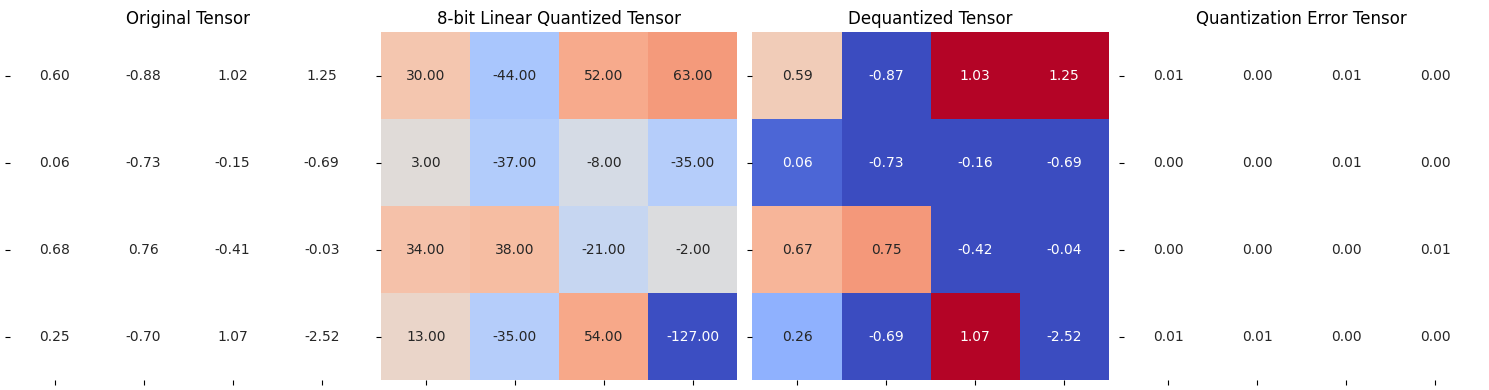

In [11]:
plot_quantization_errors(
    test_tensor, quantized_tensor, dequantized_tensor)

In [12]:
print(f"""Quantization Error : \
{quantization_error(test_tensor, dequantized_tensor)}""")

Quantization Error : 2.416166171315126e-05
